In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
col_nm= ['datetime','all_txn_cnt','all_txn_amt', 'app_txn_cnt', 'app_txn_amt', 'app_usr_cnt', 'cc_txn_cnt', 'cc_usr_cnt', 'cc_txn_amt']
df= pd.read_csv('timeseries.csv', names= col_nm)

In [197]:
df['app_txn_per_usr']= round(df.app_txn_cnt/ df.app_usr_cnt, 2)
df['cc_txn_per_usr']= round(df.cc_txn_cnt/ df.cc_usr_cnt, 2)
df['app_txn_amt_per_usr']= round(df.app_txn_amt/ df.app_usr_cnt, 2)

In [198]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [199]:
df['dayofweek']=df.datetime.dt.dayofweek

In [200]:
df.set_index('datetime', inplace=True)

In [218]:
df.head()

,all_txn_cnt,all_txn_amt,app_txn_cnt,app_txn_amt,app_usr_cnt,cc_txn_cnt,cc_usr_cnt,cc_txn_amt,app_txn_per_usr,cc_txn_per_usr,app_txn_amt_per_usr,dayofweek
datetime,,,,,,,,,,,,
2019-04-01,423,659,83,123,26,186,326,13,3.19,0.57,4.73,0
2019-04-02,2190,3837,68,95,18,2016,3585,22,3.78,0.56,5.28,1
2019-04-03,2649,4695,61,98,24,2391,4278,18,2.54,0.56,4.08,2
2019-04-04,1004,1727,60,98,22,768,1344,17,2.73,0.57,4.45,3
2019-04-05,537,769,55,88,24,394,534,14,2.29,0.74,3.67,4


Text(0, 0.5, 'App Transaction ($)')

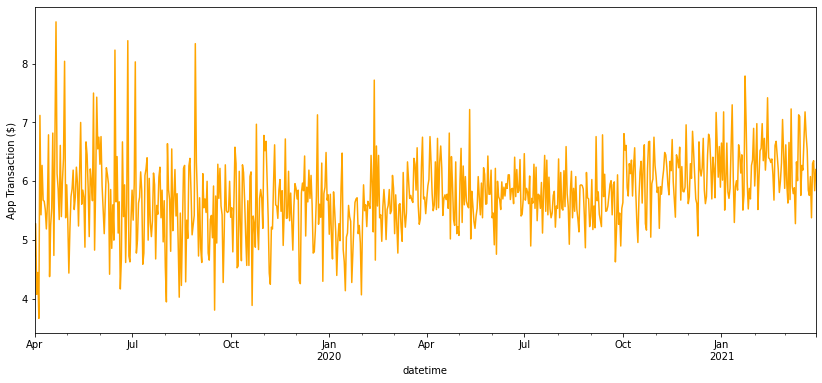

In [219]:
plt.figure(figsize=(14,6))
df.app_txn_amt_per_usr.plot(color= 'orange')
plt.ylabel('App Transaction ($)')

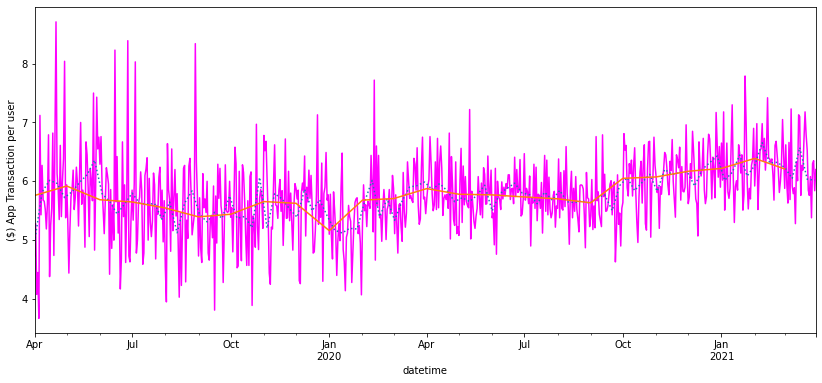

In [221]:
plt.figure(figsize=(14,6))
df.app_txn_amt_per_usr.plot(color= 'magenta')
df.app_txn_amt_per_usr.resample('W').mean().plot(style=':')
df.app_txn_amt_per_usr.resample('M').mean().plot(style='-')
plt.ylabel('($) App Transaction per user')
plt.show()

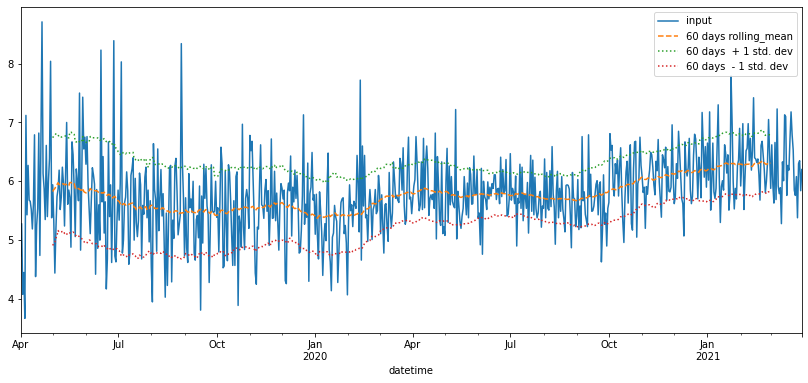

In [223]:
rolling = df.app_txn_amt_per_usr.rolling(60, center=True)
data = pd.DataFrame({'input': df.app_txn_amt_per_usr,
                     '60 days rolling_mean': rolling.mean(),
                     '60 days  + 1 std. dev': rolling.mean()+rolling.std(),
                     '60 days  - 1 std. dev': rolling.mean()-rolling.std()})
data.plot(style=['-', '--', ':', ':'], figsize=(14,6))
# lines[0].set_alpha(0.3)

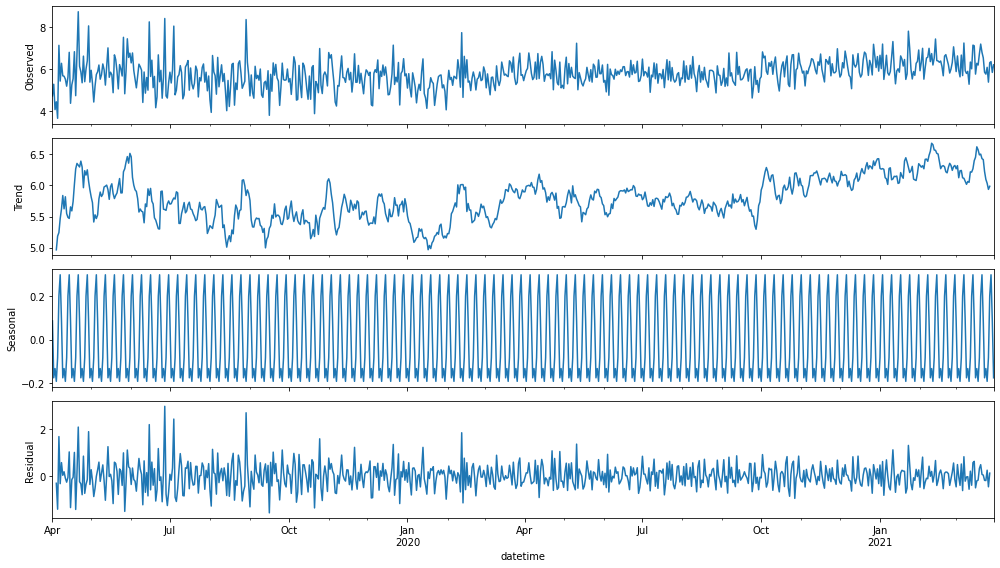

In [224]:
import statsmodels.api as sm
import matplotlib
# plt.figure(figsize=(14,6))
decomposition= sm.tsa.seasonal_decompose(df.app_txn_amt_per_usr, model= 'additive')
fig= decomposition.plot()
matplotlib.rcParams['figure.figsize']= [14, 8]

In [225]:
res=decomposition.resid.dropna().reset_index()

In [226]:
pre_camp= (res.datetime >= '2019-08-16') & (res.datetime < '2019-08-31')
camp= (res.datetime >= '2019-08-31') & (res.datetime < '2019-09-15')
post_camp= (res.datetime >= '2019-09-15') & (res.datetime <= '2019-09-29')

In [227]:
res['period']= 'outside'
res.loc[pre_camp, 'period']= '1.pre_camp'
res.loc[camp, 'period']= '2.camp'
res.loc[post_camp, 'period']= '3.post_camp'

In [228]:
camp_res= res.loc[res.period!= 'outside']

In [229]:
camp_res.columns

Index(['datetime', 'app_txn_amt_per_usr', 'period'], dtype='object')

In [231]:
camp_res.groupby('period')['app_txn_amt_per_usr'].describe()

,count,mean,std,min,25%,50%,75%,max
period,,,,,,,,
1.pre_camp,15.0,0.087420,0.990115,-1.079465,-0.552842,-0.119320,0.612320,2.694925
2.camp,15.0,-0.094812,0.545981,-1.330325,-0.369670,-0.287163,0.211301,0.886353
3.post_camp,15.0,-0.035260,0.720776,-1.588036,-0.390349,-0.099950,0.483035,1.102068


In [213]:
res

,datetime,app_txn_amt,period
0,2019-04-04,29.596552,outside
1,2019-04-05,0.033365,outside
2,2019-04-06,34.257266,outside
3,2019-04-07,-99.329632,outside
4,2019-04-08,-41.401754,outside
...,...,...,...
719,2021-03-23,-69.135457,outside
720,2021-03-24,64.122518,outside
721,2021-03-25,9.596552,outside
722,2021-03-26,-28.680921,outside


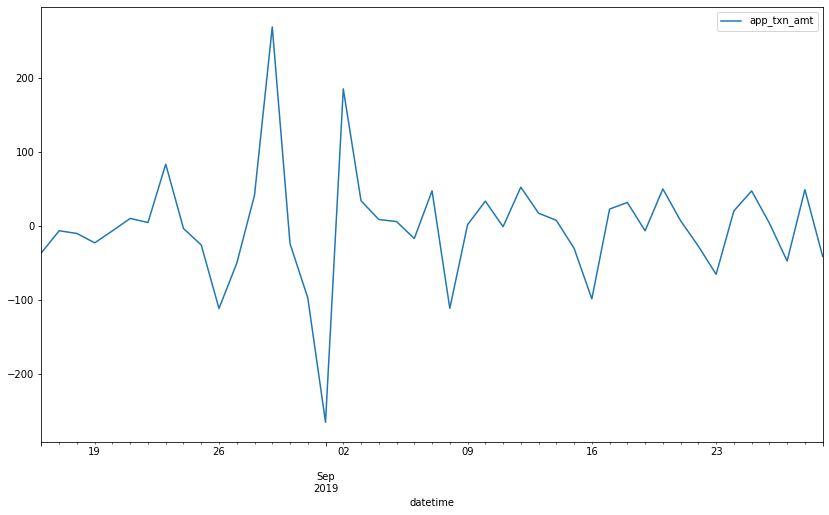

In [217]:
res.loc[res.period!='outside'].set_index('datetime').plot()